In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [60]:
netflix_data = r'C:\Users\Oluwatoyin\OneDrive - House on the Rock\Documents\NetflixOriginals.csv'

In [61]:
dataframe = pd.read_csv(netflix_data)

In [62]:
dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [63]:
dataframe.shape

(584, 6)

In [75]:
dataframe.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [64]:
print(list(dataframe.columns))

['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language']


In [65]:
print("Number of rows: ", len(dataframe))

Number of rows:  584


In [66]:
print(dataframe.head())

             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  


In [67]:
print(set(dataframe['Runtime']))

{4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 63, 64, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 144, 147, 148, 149, 151, 153, 155, 209}


In [68]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return dataframe

In [69]:
stats = return_statistics(dataframe, 'Genre', 'Runtime')
print(stats.head(15))

                              Title                    Genre  \
0                   Enter the Anime              Documentary   
1                       Dark Forces                 Thriller   
2                           The App    Science fiction/Drama   
3                    The Open House          Horror thriller   
4                       Kaali Khuhi                  Mystery   
5                             Drive                   Action   
6                 Leyla Everlasting                   Comedy   
7   The Last Days of American Crime      Heist film/Thriller   
8                           Paradox  Musical/Western/Fantasy   
9                Sardar Ka Grandson                   Comedy   
10             Searching for Sheela              Documentary   
11                         The Call                    Drama   
12                          Whipped          Romantic comedy   
13               All Because of You            Action comedy   
14                            Mercy     

In [70]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    from collections import Counter
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = df[df[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y =      df_new[numerical_column])

['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller']


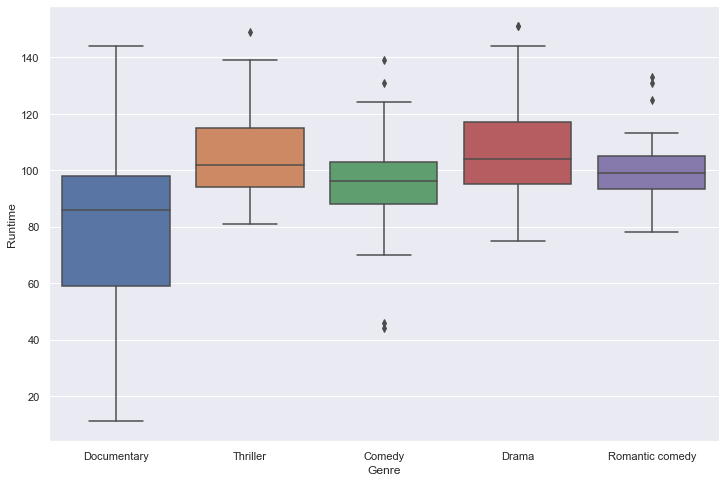

In [71]:
get_boxplot_of_categories(dataframe, 'Genre', 'Runtime', 5)

In [72]:
def get_histogram(data_frame, numerical_column):
    df_new = data_frame
    df_new[numerical_column].hist(bins=100)

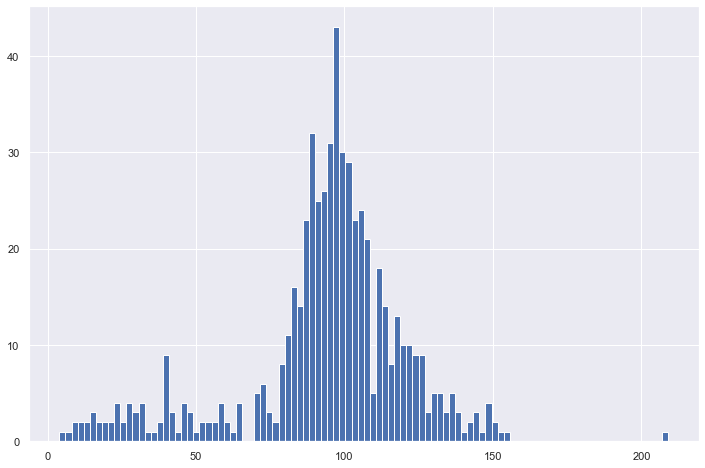

In [73]:
get_histogram(df, 'Runtime')

In [30]:
df['Year'] = df['Premiere'].astype(str).str[:4]
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Augu
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Augu
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Dece
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Janu
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Octo
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Dece
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Octo
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,Dece
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Dece


In [76]:
dataframe['Language'].unique().shape

(38,)

In [77]:
dataframe['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [78]:
dataframe['Genre'].unique().shape

(115,)

In [80]:
dataframe[dataframe['Language']=='English']

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English
14,Mercy,Thriller,"November 22, 2016",90,4.2,English
...,...,...,...,...,...,...
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


In [81]:
dataframe[['Genre', 'IMDB Score']]

,Genre,IMDB Score
0,Documentary,2.5
1,Thriller,2.6
2,Science fiction/Drama,2.6
3,Horror thriller,3.2
4,Mystery,3.4
...,...,...
579,Concert Film,8.4
580,Documentary,8.4
581,One-man show,8.5
582,Documentary,8.6


In [82]:
dataframe[dataframe['Genre']=='Thriller'].shape

(33, 6)

In [84]:
dataframe[dataframe['Genre']=='Documentary'].shape

(159, 6)

In [90]:
dataframe[dataframe['Language']=='English'].shape

(401, 6)

In [86]:
dataframe[dataframe['Genre']=='Mystery'].shape

(2, 6)

In [91]:
dataframe[dataframe['Language']=='Spanish'].shape

(31, 6)

In [92]:
dataframe[dataframe['Language']=='French'].shape

(20, 6)

In [93]:
Top_rated_movies=dataframe[(dataframe['IMDB Score']>=8.0)]

In [95]:
Top_rated_movies.groupby(['Title','Language', 'Genre']) ['IMDB Score'].sum().sort_values(ascending=True).tail(5)

Title                                        Language                  Genre       
Taylor Swift: Reputation Stadium Tour        English                   Concert Film    8.4
Winter on Fire: Ukraine's Fight for Freedom  English/Ukranian/Russian  Documentary     8.4
Springsteen on Broadway                      English                   One-man show    8.5
Emicida: AmarElo - It's All For Yesterday    Portuguese                Documentary     8.6
David Attenborough: A Life on Our Planet     English                   Documentary     9.0
Name: IMDB Score, dtype: float64

In [96]:
Top_rated_movies=dataframe[(dataframe['IMDB Score']<=8.0)]

In [97]:
Top_rated_movies.groupby(['Title','Language', 'Genre']) ['IMDB Score'].sum().sort_values(ascending=True).tail(5)

Title                                         Language  Genre      
Icarus                                        English   Documentary    7.9
Marriage Story                                English   Drama          7.9
A Secret Love                                 English   Documentary    7.9
The Ivory Game                                English   Documentary    7.9
Struggle: The Life and Lost Art of Szukaiski  English   Documentary    8.0
Name: IMDB Score, dtype: float64

In [98]:
dataframe['Language'].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [99]:
dataframe['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [100]:
dataframe['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [101]:
most_premiered_movie_year=dataframe.groupby(['Premiere','Language', 'Genre']) ['Premiere'].count().sort_values(ascending=True)

In [102]:
most_premiered_movie_year.tail()

Premiere          Language  Genre      
October 12, 2018  English   Documentary    2
March 8, 2019     English   Drama          2
November 2, 2018  English   Documentary    2
December 7, 2018  English   Documentary    2
April 27, 2018    English   Comedy         2
Name: Premiere, dtype: int64

<AxesSubplot:xlabel='Runtime', ylabel='Density'>

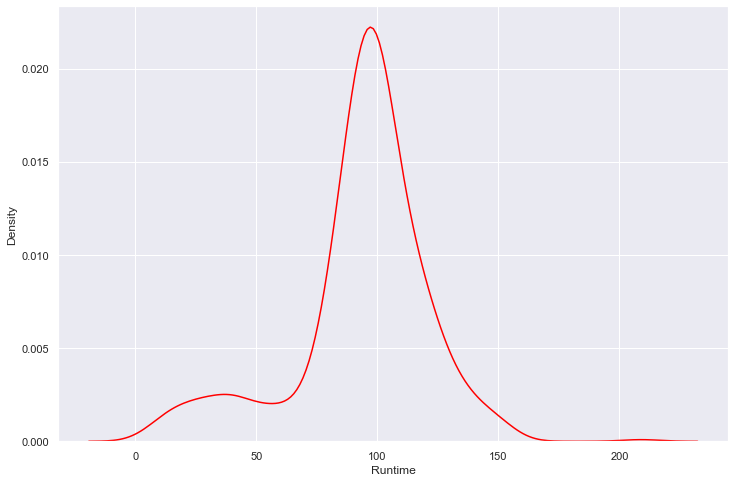

In [103]:
#A Kernel Density Estimate (KDE) Plot is used to plot the distribution of continuous data.
sns.kdeplot(x='Runtime', data = dataframe, color = 'red')